# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os

# Progress bar
from tqdm import tqdm


import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Layer model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional


from tensorflow.keras.applications import ResNet50, DenseNet201

# optimizer
from tensorflow.keras.optimizers import Adam

# Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Loading Dataset (csv Files )

In [117]:
labels_csv = pd.read_csv("../kagglehub/datasets/hsankesara/flickr-image-dataset/versions/1/flickr30k_images/results.csv",delimiter='|')

In [119]:
labels_csv.head()

image_name  comment_number  \
0  1000092795.jpg               0   
1  1000092795.jpg               1   
2  1000092795.jpg               2   
3  1000092795.jpg               3   
4  1000092795.jpg               4   

                                             comment  
0   Two young guys with shaggy hair look at their...  
1   Two young , White males are outside near many...  
2   Two men in green shirts are standing in a yard .  
3       A man in a blue shirt standing in a garden .  
4            Two friends enjoy time spent together .

# Data Preprocessing

In [120]:
# Listing Columns in the Dataframe
labels_csv.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

### 1. Creating New Columns suggesting the path of Image

In [121]:
base_path = '../kagglehub/datasets/hsankesara/flickr-image-dataset/versions/1/flickr30k_images/flickr30k_images/'
labels_csv['image_path'] = labels_csv['image_name'].apply(lambda x: base_path + x)

In [122]:
labels_csv

image_name  comment_number  \
0       1000092795.jpg               0   
1       1000092795.jpg               1   
2       1000092795.jpg               2   
3       1000092795.jpg               3   
4       1000092795.jpg               4   
...                ...             ...   
158910   998845445.jpg               0   
158911   998845445.jpg               1   
158912   998845445.jpg               2   
158913   998845445.jpg               3   
158914   998845445.jpg               4   

                                                  comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       ../kagglehub/datasets/hsankesara/flickr-image-...  
1       ../kagglehub/datasets/hsankesara/flickr-image-...  
2       ../kagglehub/datasets/hsankesara/flickr-image-...  
3       ../kagglehub/datasets/hsankesara/flickr-image-...  
4       ../kagglehub/datasets/hsankesara/flickr-image-...  
...                                                   ...  
158910  ../kagglehub/datasets/hsankesara/flickr-image-...  
158911  ../kagglehub/datasets/hsankesara/flickr-image-...  
158912  ../kagglehub/datasets/hsankesara/flickr-image-...  
158913  ../kagglehub/datasets/hsankesara/flickr-image-...  
158914  ../kagglehub/datasets/hsankesara/flickr-image-...  

[158915 rows x 4 columns]

### 2. Droping unnecessary Columns

In [123]:
# drop column='image_name'
labels_csv=labels_csv.drop(columns=['image_name'])
# drop column='comment_number'
labels_csv=labels_csv.drop(columns=[' comment_number'])

In [124]:
labels_csv

comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       ../kagglehub/datasets/hsankesara/flickr-image-...  
1       ../kagglehub/datasets/hsankesara/flickr-image-...  
2       ../kagglehub/datasets/hsankesara/flickr-image-...  
3       ../kagglehub/datasets/hsankesara/flickr-image-...  
4       ../kagglehub/datasets/hsankesara/flickr-image-...  
...                                                   ...  
158910  ../kagglehub/datasets/hsankesara/flickr-image-...  
158911  ../kagglehub/datasets/hsankesara/flickr-image-...  
158912  ../kagglehub/datasets/hsankesara/flickr-image-...  
158913  ../kagglehub/datasets/hsankesara/flickr-image-...  
158914  ../kagglehub/datasets/hsankesara/flickr-image-...  

[158915 rows x 2 columns]

### 3. Renaming columns

In [125]:
labels_csv.columns = ['comment', 'image_path']

In [126]:
labels_csv

comment  \
0        Two young guys with shaggy hair look at their...   
1        Two young , White males are outside near many...   
2        Two men in green shirts are standing in a yard .   
3            A man in a blue shirt standing in a garden .   
4                 Two friends enjoy time spent together .   
...                                                   ...   
158910   A man in shorts and a Hawaiian shirt leans ov...   
158911   A young man hanging over the side of a boat ,...   
158912   A man is leaning off of the side of a blue an...   
158913   A man riding a small boat in a harbor , with ...   
158914   A man on a moored blue and white boat with hi...   

                                               image_path  
0       ../kagglehub/datasets/hsankesara/flickr-image-...  
1       ../kagglehub/datasets/hsankesara/flickr-image-...  
2       ../kagglehub/datasets/hsankesara/flickr-image-...  
3       ../kagglehub/datasets/hsankesara/flickr-image-...  
4       ../kagglehub/datasets/hsankesara/flickr-image-...  
...                                                   ...  
158910  ../kagglehub/datasets/hsankesara/flickr-image-...  
158911  ../kagglehub/datasets/hsankesara/flickr-image-...  
158912  ../kagglehub/datasets/hsankesara/flickr-image-...  
158913  ../kagglehub/datasets/hsankesara/flickr-image-...  
158914  ../kagglehub/datasets/hsankesara/flickr-image-...  

[158915 rows x 2 columns]

### Visualization

Text(0.5, 1.0, ' Two young guys with shaggy hair look at their hands while hanging out in the yard .')

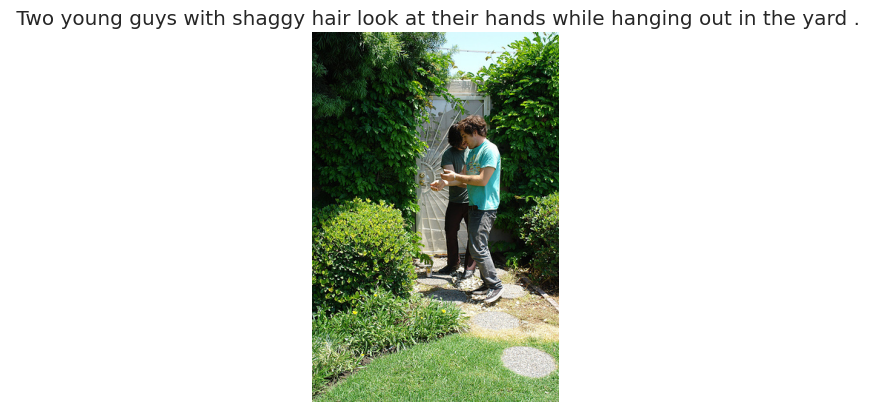

In [ ]:
from PIL import Image

# Provide the path to the image file
image_path = labels_csv['image_path'][0]

# Open the image
img = Image.open(image_path)

# Plot the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(labels_csv['comment'][0])

#### Text preprocessing

In [ ]:
def text_preprocessing(data):
    data['comment'] = data['comment'].apply(lambda x: x.lower())
    data['comment'] = data['comment'].apply(lambda x: x.replace("[^A-Za-z]",""))
    data['comment'] = data['comment'].apply(lambda x: x.replace("\s+"," "))
    data['comment'] = data['comment'].apply(lambda x: " ".join([word for word in x.split() if len(word)>1]))
    data['comment'] = "startseq "+data['comment']+" endseq"
    return data

In [129]:
print(labels_csv.dtypes)

comment       object
image_path    object
dtype: object


In [130]:
null_count = labels_csv['comment'].isna().sum()
print(f"Number of null values in 'comment' column: {null_count}")

Number of null values in 'comment' column: 1


In [131]:
labels_csv = labels_csv.dropna(subset=['comment'])


In [132]:
data = text_preprocessing(labels_csv)
captions = labels_csv['comment'].tolist()

 Two young guys with shaggy hair look at their hands while hanging out in the yard .


In [133]:
captions[0]

'startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq'

## Tokenization

In [ ]:
# Step 1: Initialize a tokenizer object
tokenizer = Tokenizer()

# Step 2: Fit the tokenizer on the list of text captions
# This builds a vocabulary from the given captions
tokenizer.fit_on_texts(captions)

# Step 3: Get the vocabulary size
# `word_index` is a dictionary mapping words to their unique integer index
# We add 1 because index 0 is reserved for padding
vocab_size = len(tokenizer.word_index) + 1

# Step 4: Determine the maximum length of any caption in the dataset
# Splitting each caption into words and finding the max word count
max_length = max(len(caption.split()) for caption in captions)

# Step 5: Extract all unique image names from the dataset
# `.unique()` ensures we get only distinct image names
# `.tolist()` converts them into a Python list
images = data['image_path'].unique().tolist()

# Step 6: Count the total number of unique images
nimages = len(images)

# Step 7: Define a train-test split index (85% for training, 15% for validation)
split_index = round(0.85 * nimages)

# Step 8: Split images into training and validation sets
train_images = images[:split_index]  # First 85% images for training
val_images = images[split_index:]    # Remaining 15% for validation

# Step 9: Filter the dataset to create training and validation sets
# Selecting rows where the `image` column belongs to train or validation images
train = data[data['image_path'].isin(train_images)]
test = data[data['image_path'].isin(val_images)]

# Step 10: Reset index for train and test datasets
# This avoids issues with old indexing after filtering
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Step 11: Convert a sample caption into a sequence of tokenized words
# `texts_to_sequences()` replaces words with their corresponding integer tokens
tokenized_caption = tokenizer.texts_to_sequences([captions[1]])[0]


In [137]:
tokenized_caption

[1, 12, 21, 20, 708, 13, 54, 79, 194, 1421, 2]

## Image Feature Extraction

In [140]:
model = DenseNet201()
fe = Model(inputs=model.input, outputs=model.layers[-2].output)

img_size = 224
features = {}
for image in tqdm(labels_csv['image_path'].unique().tolist()):
    img = load_img(os.path.join(image),target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    img = np.expand_dims(img,axis=0)
    feature = fe.predict(img, verbose=0)
    features[image] = feature

100%|██████████| 31783/31783 [1:39:07<00:00,  5.34it/s]


In [141]:
class CustomDataGenerator(Sequence):
    
    def __init__(self, df, X_col, y_col, batch_size, directory, tokenizer, 
                 vocab_size, max_length, features,shuffle=True):
    
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.directory = directory
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.features = features
        self.shuffle = shuffle
        self.n = len(self.df)
        
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __len__(self):
        return self.n // self.batch_size
    
    def __getitem__(self,index):
    
        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X1, X2, y = self.__get_data(batch)        
        return (X1, X2), y
    
    def __get_data(self,batch):
        
        X1, X2, y = list(), list(), list()
        
        images = batch[self.X_col].tolist()
           
        for image in images:
            feature = self.features[image][0]
            
            captions = batch.loc[batch[self.X_col]==image, self.y_col].tolist()
            for caption in captions:
                seq = self.tokenizer.texts_to_sequences([caption])[0]

                for i in range(1,len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=self.max_length)[0]
                    out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                    X1.append(feature)
                    X2.append(in_seq)
                    y.append(out_seq)
            
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                
        return X1, X2, y

In [147]:
input1 = Input(shape=(1920,))
input2 = Input(shape=(max_length,))

img_features = Dense(256, activation='relu')(input1)
img_features_reshaped = Reshape((1, 256), input_shape=(256,))(img_features)

sentence_features = Embedding(vocab_size, 256, mask_zero=False)(input2)
merged = concatenate([img_features_reshaped,sentence_features],axis=1)
sentence_features = LSTM(256)(merged)
x = Dropout(0.5)(sentence_features)
x = add([x, img_features])
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(vocab_size, activation='softmax')(x)

caption_model = Model(inputs=[input1,input2], outputs=output)
caption_model.compile(loss='categorical_crossentropy',optimizer='adam')

In [148]:
caption_model.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 1920)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │    491,776 │ input_layer_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, 74)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 1, 256)    │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 74, 256)   │  4,688,128 │ input_layer_25[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 75, 256)   │          0 │ reshape_6[0][0],  │
│ (Concatenate)       │                   │            │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 256)       │    525,312 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 256)       │          0 │ dropout_6[0][0],  │
│                     │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │     32,896 │ add_3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 18313)     │  2,362,377 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,100,489 (30.90 MB)

 Trainable params: 8,100,489 (30.90 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)
train_generator = CustomDataGenerator(df=train,X_col='image_path',y_col='comment',batch_size=64,directory=image_path,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

validation_generator = CustomDataGenerator(df=test,X_col='image_path',y_col='comment',batch_size=64,directory=image_path,
                                      tokenizer=tokenizer,vocab_size=vocab_size,max_length=max_length,features=features)

In [150]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [ ]:
history = caption_model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator,
        callbacks=[checkpoint,earlystopping,learning_rate_reduction])

2110/2110 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 5.2088
Epoch 1: val_loss improved from inf to 4.51752, saving model to model.h5


2110/2110 ━━━━━━━━━━━━━━━━━━━━ 4278s 2s/step - loss: 5.2086 - val_loss: 4.5175 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.


In [153]:
def idx_to_word(integer,tokenizer):
    
    for word, index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

In [154]:
def predict_caption(model, image, tokenizer, max_length, features):
    
    feature = features[image]
    in_text = "startseq"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)

        y_pred = model.predict([feature,sequence])
        y_pred = np.argmax(y_pred)
        
        word = idx_to_word(y_pred, tokenizer)
        
        if word is None:
            break
            
        in_text+= " " + word
        
        if word == 'endseq':
            break
            
    return in_text 

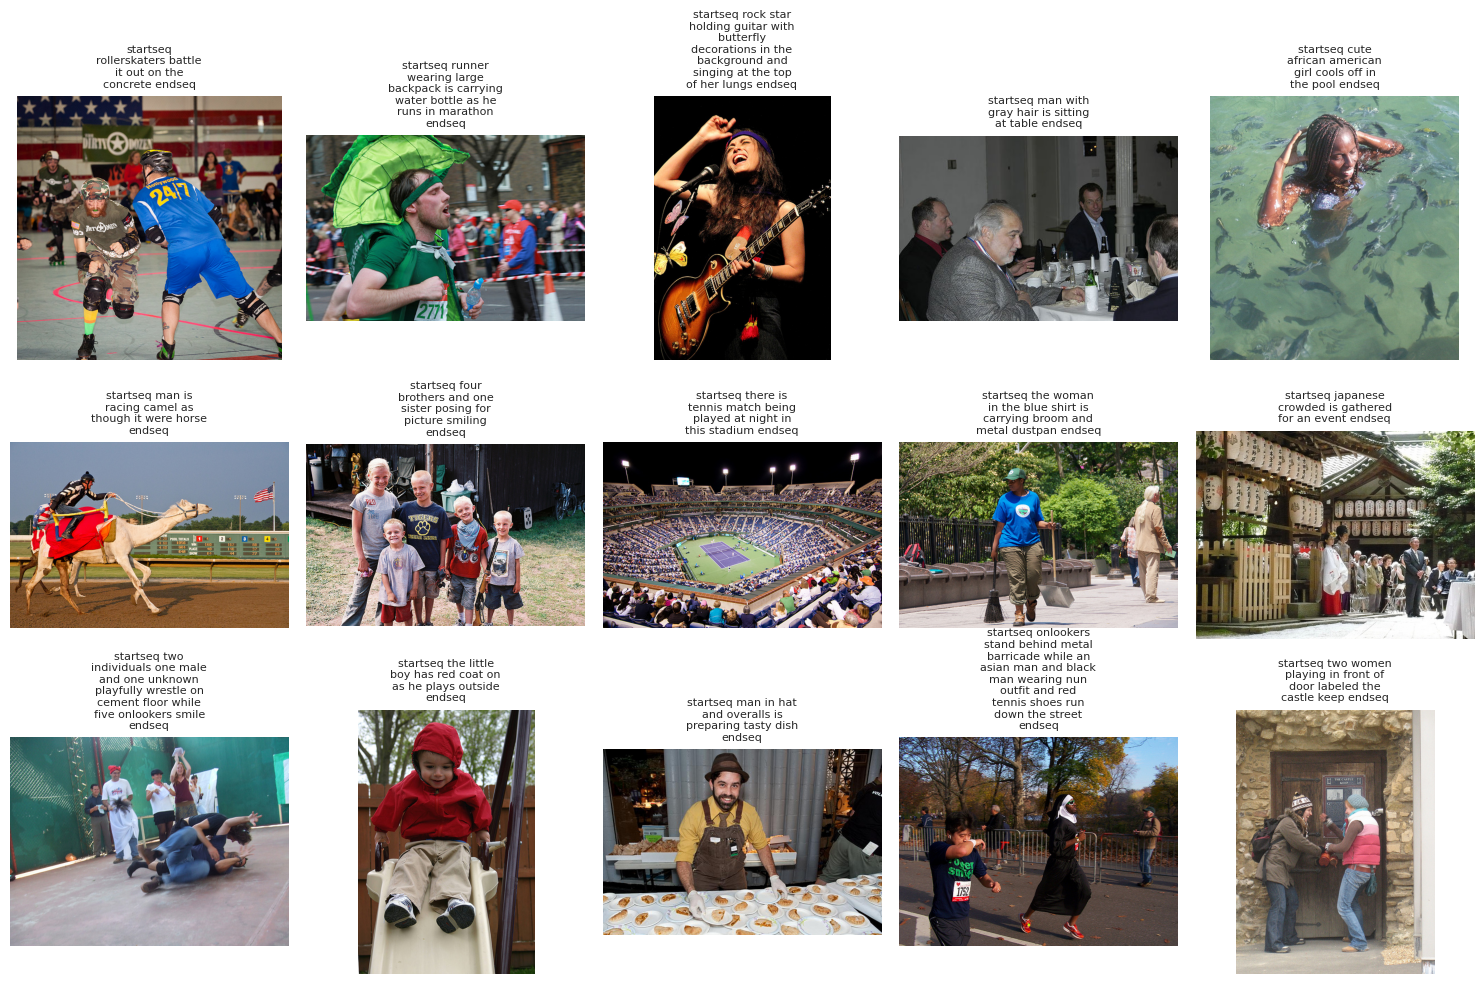

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import textwrap

# Sample 15 rows from test DataFrame
samples = test.sample(15)

# Extract references (comments)
references = samples['comment'].tolist()

# Reset index
samples.reset_index(drop=True, inplace=True)

# Plot images along with their corresponding references
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Increased height to reduce overlap
axes = axes.flatten()

for i, (img_path, ref, ax) in enumerate(zip(samples['image_path'], references, axes)):
    try:
        image = Image.open(img_path)  # Open image using PIL
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Wrap text to prevent overlap
        wrapped_text = "\n".join(textwrap.wrap(ref, width=20))  # Adjust width for better wrapping

        # Reduce font size dynamically for longer text
        font_size = 10 if len(ref) < 50 else 8

        ax.set_title(wrapped_text, fontsize=font_size)  # Set comment as title
    except Exception as e:
        ax.axis('off')
        ax.set_title("Error loading image", fontsize=10)

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

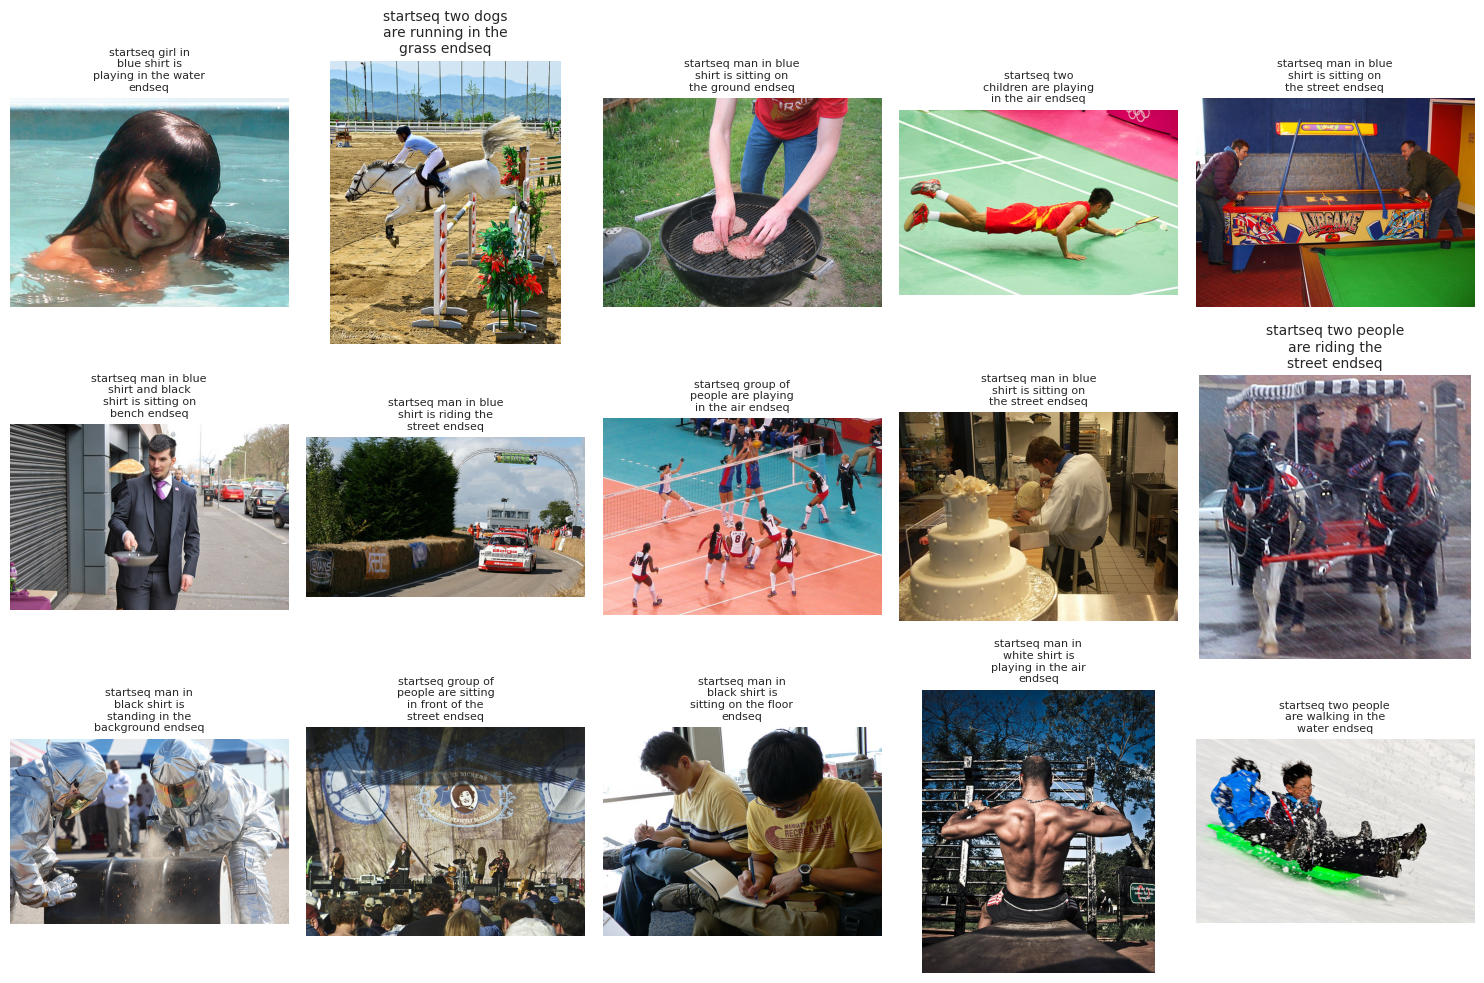

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import textwrap
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Sample 15 rows from test DataFrame
samples = test.sample(15)

# Reset index
samples.reset_index(drop=True, inplace=True)

# Store predictions
predictions = []

# Loop through samples and predict captions
for index, record in samples.iterrows():
    try:
        # Load and preprocess image
        img = load_img(os.path.join(record['image_path']), target_size=(224, 224))
        img = img_to_array(img)
        img = img / 255.0

        # Predict caption
        caption = predict_caption(caption_model, record['image_path'], tokenizer, max_length, features)
        predictions.append(caption)
        samples.loc[index, 'caption'] = caption  # Store caption in DataFrame
    except Exception as e:
        predictions.append("Error generating caption")
        samples.loc[index, 'caption'] = "Error generating caption"

# Plot images along with their corresponding predicted captions
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Adjust rows & columns as needed
axes = axes.flatten()

for i, (img_path, caption, ax) in enumerate(zip(samples['image_path'], predictions, axes)):
    try:
        image = Image.open(img_path)  # Open image using PIL
        ax.imshow(image)
        ax.axis('off')  # Hide axes

        # Wrap text to prevent overlap
        wrapped_text = "\n".join(textwrap.wrap(caption, width=20))  # Adjust width for better wrapping

        # Reduce font size dynamically for longer text
        font_size = 10 if len(caption) < 50 else 8

        ax.set_title(wrapped_text, fontsize=font_size)  # Set predicted caption as title
    except Exception as e:
        ax.axis('off')
        ax.set_title("Error loading image", fontsize=10)

plt.tight_layout()
plt.show()
